# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("summer.csv")
cities = len(df['City'].unique())
print(f"Summer olympic is held in {cities} cities.")

Summer olympic is held in 22 cities.
       Year    City      Sport           Discipline  \
0      1896  Athens   Aquatics             Swimming   
1      1896  Athens   Aquatics             Swimming   
2      1896  Athens   Aquatics             Swimming   
3      1896  Athens   Aquatics             Swimming   
4      1896  Athens   Aquatics             Swimming   
...     ...     ...        ...                  ...   
31160  2012  London  Wrestling  Wrestling Freestyle   
31161  2012  London  Wrestling  Wrestling Freestyle   
31162  2012  London  Wrestling  Wrestling Freestyle   
31163  2012  London  Wrestling  Wrestling Freestyle   
31164  2012  London  Wrestling  Wrestling Freestyle   

                         Athlete Country Gender                       Event  \
0                  HAJOS, Alfred     HUN    Men              100M Freestyle   
1               HERSCHMANN, Otto     AUT    Men              100M Freestyle   
2              DRIVAS, Dimitrios     GRE    Men  100M Freestyle F

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [2]:
gold = [[i,len(j[j['Medal'] == 'Gold'])] for i,j in df.groupby('Sport')]
sport = pd.DataFrame(gold,columns = ['Sports','Gold_medals']).sort_values(by='Gold_medals', ascending=False).iloc[0]
print(f"{sport[0]} is having most number of Gold Medals i,e {sport[1]} Gold medals.")

Aquatics is having most number of Gold Medals i,e 1421 Gold medals.


### 3. Which sport is having most number of medals so far? (Top 5)

<AxesSubplot:xlabel='Sport'>

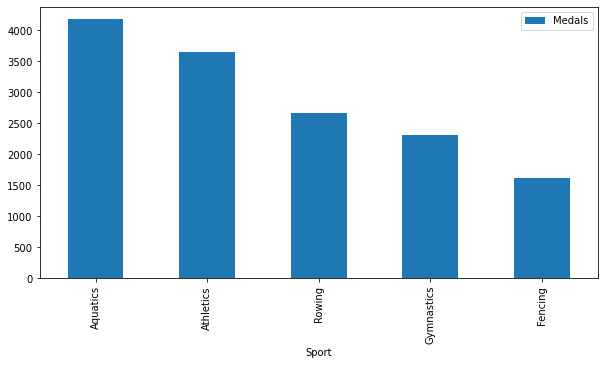

In [3]:
medals = [[i,len(j['Medal'])] for i,j in df.groupby('Sport')]
pd.DataFrame(medals,columns = ['Sport','Medals']).sort_values(by='Medals', ascending=False).head().plot(x = 'Sport', y = 'Medals', kind = 'bar', figsize = (10,5))

### 4. Which player has won most number of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

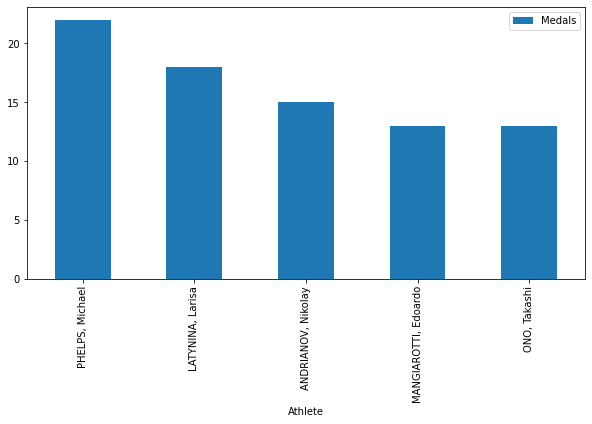

In [4]:
athletes = [ [i,len(j['Medal'])] for i,j in df.groupby('Athlete')]
pd.DataFrame(athletes,columns = ['Athlete','Medals']).sort_values(by='Medals', ascending=False).head().plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (10,5))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

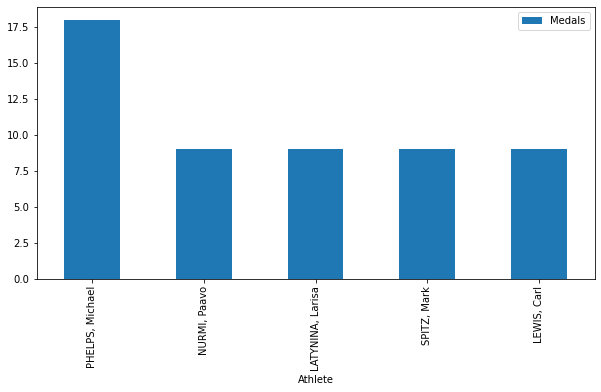

In [5]:
athletes = [ [i,len(j[j['Medal'] == 'Gold'])] for i,j in df.groupby('Athlete')]
pd.DataFrame(athletes,columns = ['Athlete','Medals']).sort_values(by='Medals', ascending=False).head().plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (10,5))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [6]:
dt = [[j[j['Medal'] == 'Gold'],j['Year']] for i,j in df.groupby('Country') if i == 'IND']
year = dt[0][0].iloc[0][0]
print(f"India won first Gold Medal in Summer Olympics in {year}")

India won first Gold Medal in Summer Olympics in 1928


### 7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

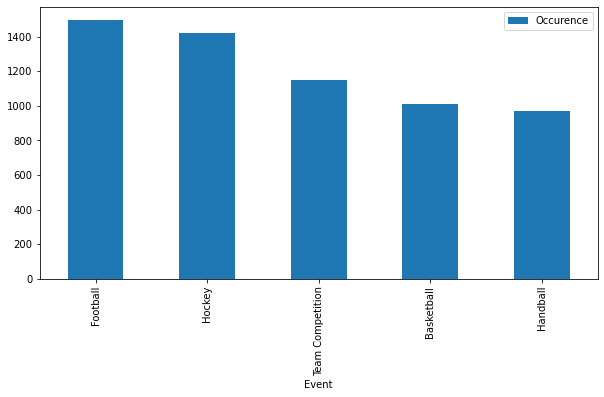

In [7]:
events = [[i,list(df['Event']).count(i)] for i in df['Event'].unique()]
pd.DataFrame(events,columns = ['Event','Occurence']).sort_values(by='Occurence', ascending=False).head().plot(x = 'Event', y = 'Occurence', kind = 'bar', figsize = (10,5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

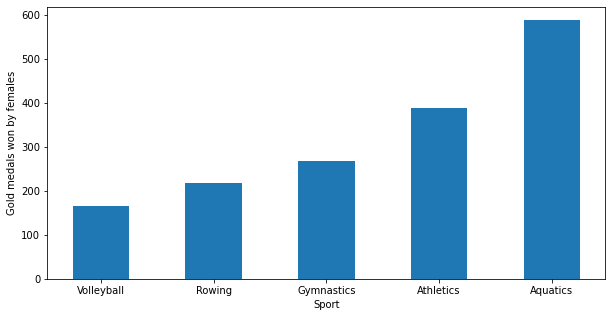

In [28]:
gold = [[i,j[j['Medal'] == 'Gold']['Gender']] for i,j in df.groupby('Sport')]
sport = []
for i in range(len(gold)):
    sport.append([gold[i][0],list(gold[i][1]).count('Women')])
sport.sort(key = lambda x: x[1])
sport, female_goldmedals = map(list, zip(*sport[-5:]))

plt.figure(figsize = (10, 5))
plt.bar(sport, female_goldmedals,width = 0.5)
plt.xlabel("Sport")
plt.ylabel("Gold medals won by females")
plt.show()